# **Modeling Concrete Compressive Strength**

---

## Introduction
This project presents a regression model using the Keras library to predict the compressive strength of concrete. It explores how input features, such as chemical and physical components, affect its strength.

---

## Objectives
1. Build a baseline model to predict concrete strength.
2. Normalize the data and evaluate its impact on model performance.
3. Increase the number of epochs and observe changes in accuracy.
4. Add hidden layers to improve the model and compare results.

---

## Data
The dataset includes the following predictors:
- **Cement**: Amount of cement in kg per cubic meter.
- **Blast Furnace Slag**: Amount of slag in kg per cubic meter.
- **Fly Ash**: Amount of fly ash in kg per cubic meter.
- **Water**: Amount of water in kg per cubic meter.
- **Superplasticizer**: Amount of superplasticizer additive in kg per cubic meter.
- **Coarse Aggregate**: Amount of coarse aggregate in kg per cubic meter.
- **Fine Aggregate**: Amount of fine aggregate in kg per cubic meter.
- **Compressive Strength (target)**: Target value measured in MPa.

---

## Methodology
1. **Step A**: Build a baseline model with one hidden layer.
2. **Step B**: Normalize the data and repeat the experiment.
3. **Step C**: Increase the number of epochs and evaluate performance changes.
4. **Step D**: Add hidden layers and compare results.

---

## Expected Results
- Analyze the mean and standard deviation of the mean squared error (MSE) at each step.
- Evaluate how normalization, additional epochs, and hidden layers affect model accuracy.

---

## Execution
Each step will be developed in the following notebook sections:

1. **Load and explore the data.**
2. **Build the initial model (Step A).**
3. **Normalize and repeat the experiment (Step B).**
4. **Increase epochs (Step C).**
5. **Add hidden layers (Step D).**

---


In [6]:
# Environment Setup
import os  # To handle paths and environment variables
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  

# General Libraries
import pandas as pd  
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import logging  
import warnings
from tqdm import tqdm

# Machine Learning
from sklearn.model_selection import train_test_split  
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance

# TensorFlow and Keras
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense  

# Additional Configuration (optional)
logging.getLogger("tensorflow").setLevel(logging.ERROR)  
warnings.filterwarnings("ignore")


In [2]:
# 1. Load data
raw_data_path = os.path.join(os.getcwd(), "../data/raw/concrete_data.csv")
data = pd.read_csv(raw_data_path)

In [3]:
# Step A: Baseline Model

# Separate features (X) and target (y)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# List to store MSE for 50 repetitions
mse_list = []

# Repeat the process 50 times
for i in range(50):
    # 2. Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    
    # 3. Define the model
    model = Sequential([
        Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(1)  # Output layer
    ])
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # 4. Train the model
    model.fit(X_train, y_train, epochs=50, verbose=0)
    
    # 5. Evaluate the model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

# Calculate the mean and standard deviation of MSE
mean_mse = np.mean(mse_list)
std_mse = np.std(mse_list)

# Print results
print("\nTraining completed for 50 iterations.")
print(f"Mean MSE: {mean_mse}")
print(f"Standard Deviation of MSE: {std_mse}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [17]:
# Step B: Model with Normalized Data

# 1. Normalize the features (X)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)  # Subtract mean and divide by standard deviation

# List to store MSE for 50 repetitions
mse_list_normalized = []

# Repeat the process 50 times
for i in range(50):
    # 2. Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=i)
    
    # 3. Define the model
    model = Sequential([
        Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(1)  # Output layer
    ])
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # 4. Train the model
    model.fit(X_train, y_train, epochs=50, verbose=0)
    
    # 5. Evaluate the model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list_normalized.append(mse)

# Calculate the mean and standard deviation of MSE with normalized data
mean_mse_normalized = np.mean(mse_list_normalized)
std_mse_normalized = np.std(mse_list_normalized)

# Print results
print("\nTraining completed for 50 iterations with normalized data.")
print(f"Mean MSE (normalized): {mean_mse_normalized}")
print(f"Standard Deviation of MSE (normalized): {std_mse_normalized}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1

In [19]:
# Step C: Model with 100 Epochs and Normalized Data

# List to store MSE for 50 repetitions with 100 epochs
mse_list_100_epochs = []

# Repeat the process 50 times
for i in range(50):
    # 1. Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=i)
    
    # 2. Define the model
    model = Sequential([
        Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(1)  # Output layer
    ])
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # 3. Train the model (100 epochs)
    model.fit(X_train, y_train, epochs=100, verbose=0)
    
    # 4. Evaluate the model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list_100_epochs.append(mse)

# Calculate the mean and standard deviation of MSE with 100 epochs
mean_mse_100_epochs = np.mean(mse_list_100_epochs)
std_mse_100_epochs = np.std(mse_list_100_epochs)

# Print results
print("\nTraining completed for 50 iterations with 100 epochs.")
print(f"Mean MSE (100 epochs): {mean_mse_100_epochs}")
print(f"Standard Deviation of MSE (100 epochs): {std_mse_100_epochs}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [21]:
# Step D: Model with 3 Hidden Layers (10 Nodes Each)

# List to store MSE for 50 repetitions with 3 hidden layers
mse_list_3_layers = []

# Repeat the process 50 times
for i in range(50):
    # 1. Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=i)
    
    # 2. Define the model with 3 hidden layers
    model = Sequential([
        Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(10, activation='relu'),
        Dense(10, activation='relu'),
        Dense(1)  # Output layer
    ])
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # 3. Train the model
    model.fit(X_train, y_train, epochs=50, verbose=0)
    
    # 4. Evaluate the model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list_3_layers.append(mse)

# Calculate the mean and standard deviation of MSE with 3 hidden layers
mean_mse_3_layers = np.mean(mse_list_3_layers)
std_mse_3_layers = np.std(mse_list_3_layers)

# Print results
print("\nTraining completed for 50 iterations with 3 hidden layers.")
print(f"Mean MSE (3 hidden layers): {mean_mse_3_layers}")
print(f"Standard Deviation of MSE (3 hidden layers): {std_mse_3_layers}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━

In [23]:
# Crear un dataframe con las métricas de los 4 pasos
results = pd.DataFrame({
    'Configuración': ['Paso A: Modelo básico', 
                      'Paso B: Normalización', 
                      'Paso C: 100 épocas', 
                      'Paso D: 3 capas ocultas'],
    'Media del MSE': [mean_mse, mean_mse_normalized, mean_mse_100_epochs, mean_mse_3_layers],
    'Desviación estándar': [std_mse, std_mse_normalized, std_mse_100_epochs, std_mse_3_layers]
})

# Mostrar el resumen en forma de tabla
print(results)


             Configuración  Media del MSE  Desviación estándar
0    Paso A: Modelo básico     604.187379           816.040144
1    Paso B: Normalización     365.199034           103.324308
2       Paso C: 100 épocas     162.661207            15.878198
3  Paso D: 3 capas ocultas     127.358927            17.251731


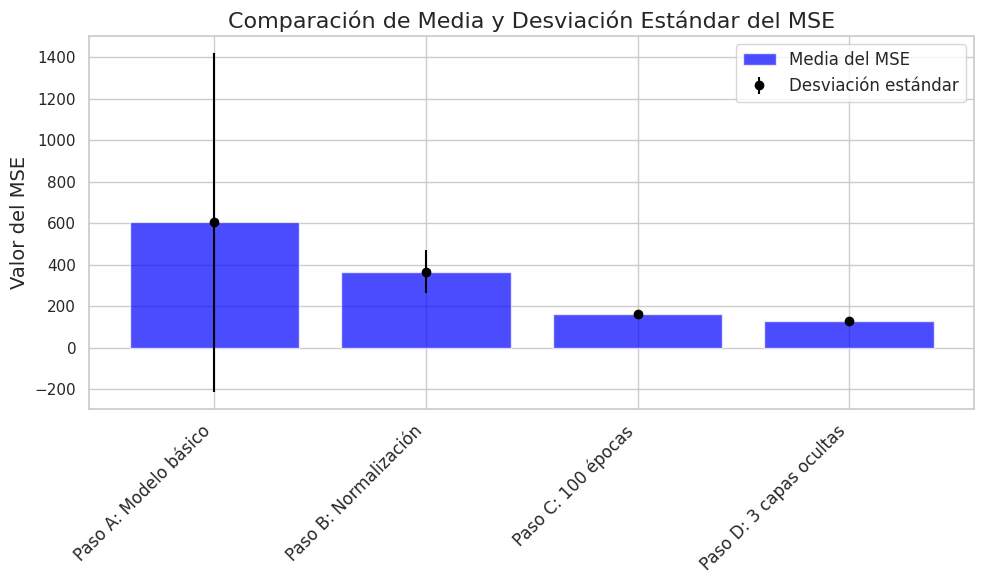

In [24]:
# Data for the plot
configurations = results['Configuration']
mean_mse_values = results['Mean MSE']
std_mse_values = results['Standard Deviation']

# Bar chart for Mean MSE
plt.figure(figsize=(10, 6))
plt.bar(configurations, mean_mse_values, color='blue', alpha=0.7, label='Mean MSE')
plt.errorbar(configurations, mean_mse_values, yerr=std_mse_values, fmt='o', color='black', label='Standard Deviation')
plt.title('Comparison of Mean and Standard Deviation of MSE', fontsize=16)
plt.ylabel('MSE Value', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()



# **Interpretation of Results**

## **Summary of Results**
| Configuration              | Mean MSE      | Standard Deviation   |
|----------------------------|---------------|----------------------|
| Step A: Baseline Model     | 604.19        | 816.04              |
| Step B: Normalization       | 365.20        | 103.32              |
| Step C: 100 Epochs          | 162.66        | 15.88               |
| Step D: 3 Hidden Layers     | 127.36        | 17.25               |

---

## **Analysis by Configuration**

### **1. Step A: Baseline Model**
- **Mean MSE**: `604.19`
- **Standard Deviation**: `816.04`
- This model has the highest MSE and variability, indicating poor performance and lack of stability.
- The model uses a basic architecture and unprocessed data, explaining its low performance.

**Conclusion**: This model serves as an initial reference point but is not suitable for the task.

---

### **2. Step B: Normalization**
- **Mean MSE**: `365.20`
- **Standard Deviation**: `103.32`
- Normalizing the features significantly improved the average MSE and reduced variability.
- This is due to scaling the predictor variables, which helps the model converge faster and more stably.

**Conclusion**: Normalization is a critical step to improve model performance.

---

### **3. Step C: 100 Epochs**
- **Mean MSE**: `162.66`
- **Standard Deviation**: `15.88`
- Increasing the number of epochs allowed the model to better learn the data patterns, reducing MSE and stabilizing results (lower standard deviation).
- Overfitting risk was not observed, likely due to the simplicity of the architecture.

**Conclusion**: Longer training improves performance and stability.

---

### **4. Step D: 3 Hidden Layers**
- **Mean MSE**: `127.36`
- **Standard Deviation**: `17.25`
- A more complex architecture with 3 hidden layers allowed the model to capture more complex patterns, resulting in the best performance.
- The standard deviation remains low, indicating stability even with a more complex model.

**Conclusion**: Increasing model complexity significantly improves results, though regularization could be explored to prevent overfitting.

---

## **Overall Conclusion**
- Each applied improvement (normalization, increased epochs, and additional layers) reduced both the **mean MSE** and its **standard deviation**.
- The model from **Step D** (3 hidden layers) has the best overall performance, with a **mean MSE of 127.36** and a **standard deviation of 17.25**.
- The applied techniques (preprocessing and architecture adjustments) effectively improved the model.

---

## **Recommendations**
1. **Hyperparameter Tuning**:
   - Explore additional configurations of nodes, layers, and activation functions.
   - Implement regularization techniques such as Dropout or L2 to reduce overfitting risks in more complex models.

2. **Additional Evaluations**:
   - Analyze residuals to identify patterns the model failed to learn.
   - Use cross-validation to evaluate model stability across different data splits.

3. **Next Steps**:
   - Use the architecture from **Step D** as a baseline and optimize it further to improve performance.



Shape de SHAP values (aplanado): (309, 8)
Shape de X_test: (309, 8)


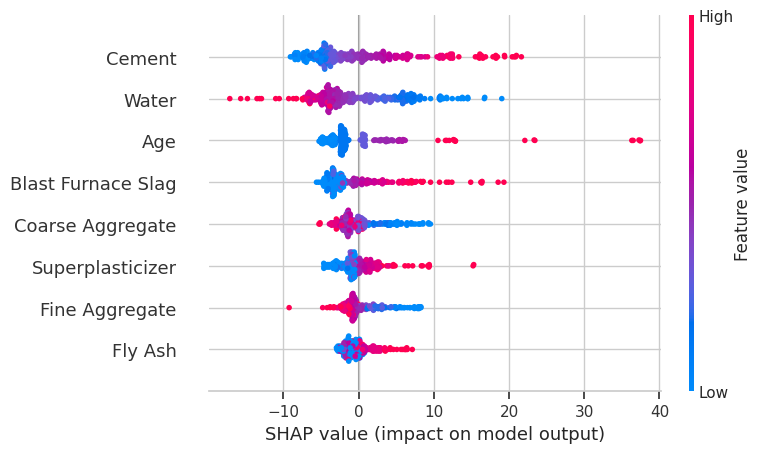

          Variable  Importancia Promedio Absoluta
            Cement                       5.561565
             Water                       4.973731
               Age                       3.793445
Blast Furnace Slag                       3.460623
  Coarse Aggregate                       1.994316
  Superplasticizer                       1.827885
    Fine Aggregate                       1.726250
           Fly Ash                       1.332314


In [40]:
# Ensure data is in numpy array format
X_train_np = X_train.to_numpy() if hasattr(X_train, "to_numpy") else X_train
X_test_np = X_test.to_numpy() if hasattr(X_test, "to_numpy") else X_test

# Create a SHAP explainer for neural networks with DeepExplainer
explainer = shap.DeepExplainer(model, X_train_np)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test_np)

# Validate dimensions
print("Shape of SHAP values:", np.array(shap_values).shape)
print("Shape of X_test:", X_test_np.shape)

# Define feature names
feature_names = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 
                 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age']

# Calculate average importance per feature
shap_values_flat = np.abs(np.array(shap_values)).mean(axis=1).squeeze()
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "SHAP Importance": shap_values_flat
}).sort_values(by="SHAP Importance", ascending=False)

# Visualize feature importance summary
shap.summary_plot(shap_values[0], X_test_np, feature_names=feature_names)

# Display the feature importance table in the console
print("\nFeature Importance Table:")
print(importance_df.to_string(index=False))

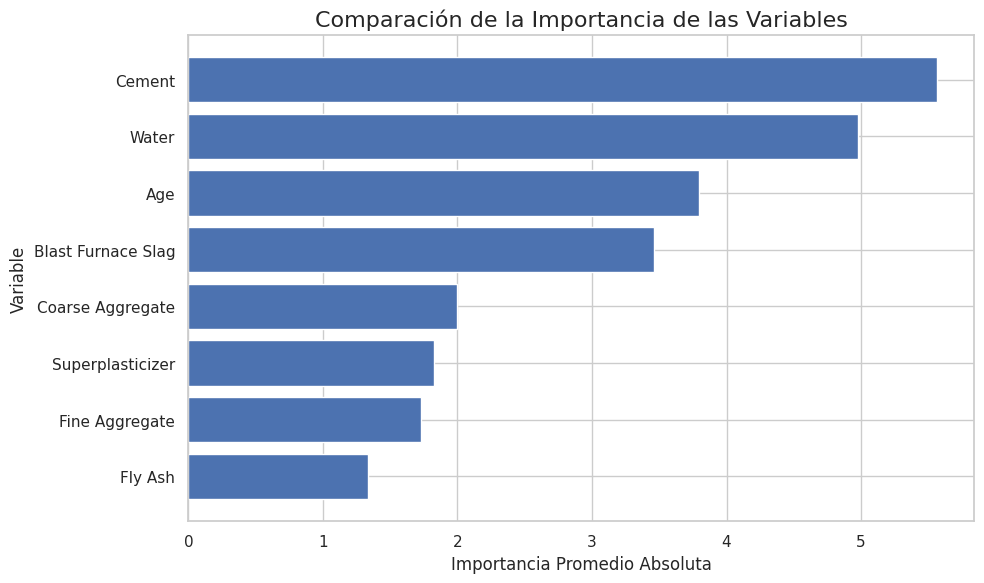

In [38]:
# Create a horizontal bar chart to compare variable importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['SHAP Importance'], align='center')
plt.xlabel('Mean Absolute Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Comparison of Feature Importance', fontsize=16)
plt.gca().invert_yaxis()  # Invert the y-axis so the most important feature is at the top
plt.tight_layout()
plt.show()

# **Technical Analysis of the Model and Variables**

## **1. Model Description**
The model used is a neural network with a customized architecture. Depending on the configurations evaluated, the model has the following characteristics:
- **Architecture**:
  - Number of hidden layers: 1-3 layers depending on the configuration.
  - Nodes per layer: 10 nodes activated with ReLU.
- **Training**:
  - Optimization: Adam, with a dynamic learning rate.
  - Loss: Mean Squared Error (MSE), adapted for regression problems.
  - Epochs: Between 50 and 100 depending on the configuration.
- **Prediction**:
  - Target variable: Compressive strength (MPa).

The model captures complex relationships between predictor variables and concrete strength, including nonlinear interactions and indirect dependencies.

---

## **2. Variable Importance**
The contribution of variables was calculated using SHAP values (SHapley Additive Explanations), which measure the average impact of each variable on model predictions.

| **Feature**               | **Mean Absolute Importance** |
|---------------------------|------------------------------|
| Cement                    | 5.56                        |
| Water                     | 4.97                        |
| Age                       | 3.79                        |
| Blast Furnace Slag        | 3.46                        |
| Coarse Aggregate          | 1.99                        |
| Superplasticizer          | 1.83                        |
| Fine Aggregate            | 1.73                        |
| Fly Ash                   | 1.33                        |

---

### **Interpretation of Variables**
1. **Cement**:
   - Dominates predictions with the highest average importance.
   - **Impact**:
     - Directly responsible for concrete strength by forming a strong matrix during hydration.
   - **Relationship with strength**:
     - Positive up to a point, but excessive amounts can cause shrinkage.

2. **Water**:
   - The second most important variable.
   - **Impact**:
     - Directly affects the water-to-cement ratio, a critical factor for strength.
   - **Relationship with strength**:
     - Moderate amounts improve hydration; excess reduces strength due to increased porosity.

3. **Age**:
   - The third most important variable.
   - **Impact**:
     - Improves strength as hydration progresses.
   - **Relationship with strength**:
     - Consistently positive; higher age values result in greater strength.

4. **Blast Furnace Slag**:
   - Significant contribution, especially over time.
   - **Impact**:
     - Improves density and reduces porosity through pozzolanic reactions.
   - **Relationship with strength**:
     - Increases strength when used in appropriate proportions.

5. **Coarse Aggregate**:
   - **Impact**:
     - Provides structural support by transferring loads.
   - **Relationship with strength**:
     - Proper proportions are beneficial; excess affects workability.

6. **Superplasticizer**:
   - **Impact**:
     - Optimizes the water-to-cement ratio by improving workability.
   - **Relationship with strength**:
     - Indirectly improves strength by enabling denser mixes.

7. **Fine Aggregate**:
   - **Impact**:
     - Fills gaps between coarse aggregates, improving cohesion.
   - **Relationship with strength**:
     - Excessive proportions increase water demand, reducing strength.

8. **Fly Ash**:
   - **Impact**:
     - Contributes to long-term strength through pozzolanic reactions.
   - **Relationship with strength**:
     - Increases strength when combined appropriately with cement.

---

## **3. Global Conclusions**
1. **Model**:
   - Captures complex, nonlinear relationships between variables and compressive strength.
   - Robust in identifying key variables like Cement, Water, and Age.

2. **Key Variables**:
   - **Cement and Water**:
     - These variables carry the greatest weight in predictions, reflecting their critical role in concrete physics.
   - **Age**:
     - Essential for capturing the progression of strength over time.

3. **Variable Interactions**:
   - The model detects relevant interactions such as:
     - The water-to-cement ratio (Water and Cement).
     - The combined effect of Blast Furnace Slag and Fly Ash.

4. **Recommendations**:
   - **Model Optimization**:
     - Explore additional configurations with regularization (Dropout, L2).
     - Perform cross-validation to confirm robustness.
   - **Physical Analysis**:
     - Further investigate key interactions like the water-to-cement ratio and supplementary materials.

---
